In [1]:
from set_math import *
from set_visualization import *

sympy imported
pandas imported
numpy imported
scipy imported


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels imported
statsmodels.formula imported
statasmodels.stats.api imported
matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary


In [3]:
df = pd.read_csv("http://stat.tamu.edu/~sheather/book/docs/datasets/nyc.csv", encoding='latin1')
del df["Case"]
print(df.shape)
df.tail()

(168, 6)


,Restaurant,Price,Food,Decor,Service,East
163,Baci,31,17,15,16,0
164,Puccini,26,20,16,17,0
165,Bella Luna,31,18,16,17,0
166,Métisse,38,22,17,21,0
167,Gennaro,34,24,10,16,0


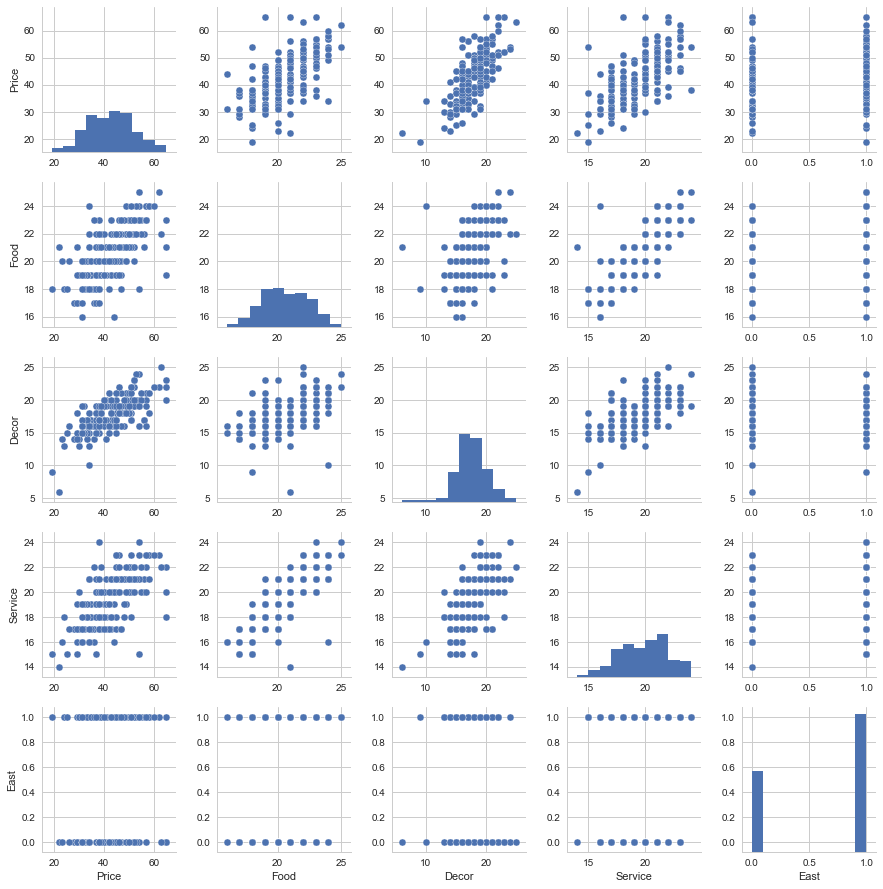

In [39]:
sns.pairplot(df)
plt.show()

### 1번

In [40]:
##### import statsmodels

# dfX0 = pd.DataFrame(df, columns=["Food ~ Decor', 'Service', 'East'])
# dfX = sm.add_constant(dfX0)
# dfy = pd.DataFrame(df, columns=["Price"])

# model_restaurant = sm.OLS.from_formula(dfy, dfX)
# result_restaurant = model_restaurant.fit()
# print(result_restaurant.summary())

model_restaurant1 = sm.OLS.from_formula("Price ~ Food + Decor + Service + C(East)", data=df)
result_restaurant1 = model_restaurant1.fit()
print(result_restaurant1.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           5.35e-34
Time:                        19:22:36   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -24.0238      4.708     -5.102   

### 2번

답 : Decor

### 3번

- 식당의 위치는 영향을 미친다.
- East의 식당은 West의 식당보다 약 2배 정도 가격이 비싸다고 말 할 수 있다.

### 4번

답 : Serivce

### 5번

답 : 모델1과 모델2의 F-Statistic 값을 비교했을 때, 모델2의 값이 더 작으므로, 모델의 성능이 더 좋다고 할 수 있다.

In [51]:
model_restaurant2 = sm.OLS.from_formula("Price ~ Food + Decor + C(East)", data=df)
result_restaurant2 = model_restaurant2.fit()
print(result_restaurant2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           5.10e-35
Time:                        19:53:15   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -24.0269      4.673     -5.142   

### 6번

답 : 46.95

In [52]:
data = [{'Food' : 20,
       'Decor' : 20,
       'Service': 20,
       'East':1}]

test = pd.DataFrame(data)

test = sm.add_constant(test, has_constant='add')
test

,const,Decor,East,Food,Service
0,1.0,20,1,20,20


In [53]:
result_restaurant2.predict(test)

0    46.954506
dtype: float64

### 7번

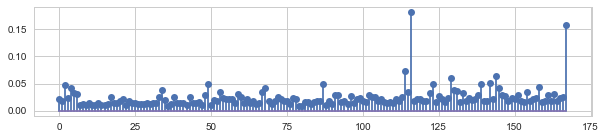

In [20]:
influence = result_restaurant2.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

### 8번

### 9번

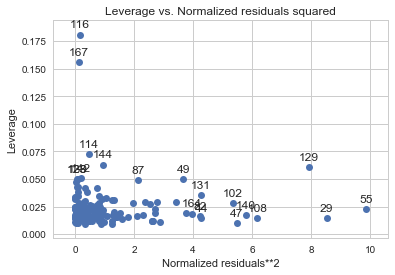

In [38]:
sm.graphics.plot_leverage_resid2(result_restaurant2)
plt.show()